# SQLAlchemy Homework - Surfs Up!

### Before You Begin

1. Create a new repository for this project called `sqlalchemy-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Add your Jupyter notebook and `app.py` to this folder. These will be the main scripts to run for analysis.

4. Push the above changes to GitHub or GitLab.

![surfs-up.png](Images/surfs-up.png)

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

## Step 1 - Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files to complete your climate analysis and data exploration.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

  ![precipitation](Images/precipitation.png)

* Use Pandas to print the summary statistics for the precipitation data.

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

    ![station-histogram](Images/station-histogram.png)

- - -



In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd


In [3]:
import datetime as dt

In [4]:
import seaborn as sns
from scipy.stats import linregress
from sklearn import datasets

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#Base.metadata.create_all(engine)

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect= True)

# Reflect Database into ORM class

# Measurement = Base.classes.measurement

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [14]:
engine.execute('Select * from measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [ ]:
#Measurement

In [15]:
# Get columns of 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c)


{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [16]:
# A very odd way to get all column values if they are made by tuples with keys and values, it's more straightforward
# and sensible to just do columns = inspector.get_columns('measurement') the a for loop: for c in columns:  print(c)

columns = inspector.get_columns('measurement')
for c in columns:
    print(c.keys())
for c in columns:
    print(c.values())



dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_values(['id', INTEGER(), False, None, 'auto', 1])
dict_values(['station', TEXT(), True, None, 'auto', 0])
dict_values(['date', TEXT(), True, None, 'auto', 0])
dict_values(['prcp', FLOAT(), True, None, 'auto', 0])
dict_values(['tobs', FLOAT(), True, None, 'auto', 0])


In [ ]:
# for plotting, I wanted the range of precipitation over the entire table
max_prcp = session.query(func.max(Measurement.prcp)).all()[0][0]
max_prcp

In [17]:
min_prcp = session.query(func.min(Measurement.prcp)).all()[0][0]
min_prcp

0.0

In [18]:
# Getting column values from each table, here 'station'
columns = inspector.get_columns('station')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Design a query to retrieve the last 12 months of precipitation data.
max_date = session.query(func.max(Measurement.date)).all()[0][0]


# Select only the date and prcp values. 
##datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

import datetime 
print(max_date)
print(type(max_date))

# Calculate the date 1 year ago from the last data point in the database

min_date = datetime.datetime.strptime(max_date,'%Y-%m-%d') - datetime.timedelta(days = 365)
print(min_date)
print(min_date.year, min_date.month, min_date.day)


# Perform a query to retrieve the data and precipitation scores
results2  = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > min_date).all()
results2

# Load the query results into a Pandas DataFrame and set the index to the date column.

prcp_anal = pd.DataFrame(results2, columns = ['prcp','date']).set_index('date')

# Sort the DataFrame values by date.
prcp_anal.sort_values(by=['date'], inplace=True)

prcp_anal



                    




2017-08-23
<class 'str'>
2016-08-23 00:00:00
2016 8 23


,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


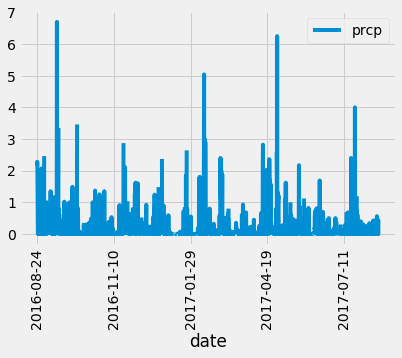

In [20]:
# Create Plot--I cannot get rid of second image, error message, or third image


# Plot the raw data before setting the datetime index
prcp_anal.plot(rot = 90)
#prcp_anal.plot()
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation over One Year in Hawaii')
plt.show()

# # Convert the 'date' column into a collection of datetime objects: df.Date
# prcp_anal.plot(rot = 90)
# prcp_anal.Date = pd.to_datetime(prcp_anal.date)

# # Set the index to be the converted 'Date' column
# prcp_anal.plot(rot = 90)
# set_index('date',inplace=True)
# prcp_anal.reset_index()

# # Re-plot the DataFrame to see that the axis is now datetime aware!
# prcp_anal.plot(rot = 90)
# prcp_anal.plot()
# plt.show()

In [ ]:
# prcp_anal.plot(y= 'prcp', rot = 90)
# plt.bar(rot = 90)

# prcp_anal.set_index('date', inplace = True)
# plt.show

In [ ]:
# Plot
# Scatterplot with varying size and color of points
import pandas as pd
prcp_anal = pd.read_csv("./Resources/hawaii_measurements.csv")



fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('date', 'prcp', data = prcp_anal,s, cmap='blues', edgecolors='black', linewidths=.5)
plt.title("Precipitation August 2016 to August 2017")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation', fontsize=18)
plt.colorbar()
plt.show()     


In [ ]:
# Re-Call the original DF before I reset index to 'date' column in order to try 
prcp_anal = pd.DataFrame(results2, columns = ['prcp','date'])
prcp_anal.describe()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# I wanted a range of precipitation amounts for plotting purposes...the code on line 3 and 4 and 5 didn't work

## prcp_anal.max_prcp = session.query(func.max(Measurement.prcp.filter(Measurement.date >= '2016-08-23' ))).\
## order_by(func.max(Items.UnitPrice * Items.Quantity).desc()).all()
## prcp_anal.max_prcp

prcp_anal_max_prcp = session.query(Measurement.prcp, func.max(Measurement.prcp)).\
    filter(Measurement.date >= '2016-08-23').\
    group_by(Measurement.date).\
    order_by(func.max(Measurement.prcp).asc()).all()
prcp_anal_max_prcp



In [ ]:
# I wanted a range of prcp values for the year in our DataFrame 
prcp_anal_min_prcp = session.query(Measurement.prcp, func.min(Measurement.prcp)).\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.date).\
    order_by(func.min(Measurement.prcp).asc()).all().
prcp_anal_min_prcp

In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
